In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
X = pd.read_csv('dengue_features_train.csv')
y = pd.read_csv('dengue_labels_train.csv')
X_test = pd.read_csv('dengue_features_test.csv')

In [105]:
X_sj = X.loc[X['city'] =='sj'].copy()
y_sj = y.loc[y['city'] =='sj'].copy()

X_iq = X.loc[X['city'] =='iq'].copy()
y_iq = y.loc[y['city'] =='iq'].copy()

X_sj = X_test.loc[X_test['city'] == 'sj'].copy()
y_sj = y_test.loc[y_test['city'] == 'sj'].copy()

X_iq_test = X_test.loc[X_test['city'] == 'iq'].copy()
y_iq_test = y_test.loc[y_test['city'] == 'iq'].copy()

In [106]:
X_sj_train.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [107]:
X_iq_train.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [108]:
X_sj_train = X_sj_train.interpolate()
X_iq_train = X_iq_train.interpolate()
X_sj_test = X_sj_test.interpolate()
X_iq_test = X_iq_test.interpolate()

In [109]:
X_sj_train.drop(labels=['year','weekofyear','city', 'week_start_date'], axis=1,inplace=True)
y_sj_train.drop(labels=['year','weekofyear','city'], axis=1,inplace=True)

X_iq_train.drop(labels=['year','weekofyear','city', 'week_start_date'], axis=1,inplace=True)
y_iq_train.drop(labels=['year','weekofyear','city'], axis=1,inplace=True)

X_sj_test.drop(labels=['year','weekofyear','city', 'week_start_date'], axis=1,inplace=True)
y_sj_test.drop(labels=['year','weekofyear','city'], axis=1,inplace=True)

X_iq_test.drop(labels=['year','weekofyear','city', 'week_start_date'], axis=1,inplace=True)
y_iq_test.drop(labels=['year','weekofyear','city'], axis=1,inplace=True)

In [110]:
X_sj_test['inde'] = list(range(1000,1260))
X_sj_test = X_sj_test.set_index(['inde'])

y_sj_test['inde'] = list(range(1000,1260))
y_sj_test = y_sj_test.set_index(['inde'])

X_sj_test.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
inde,,,,,,,,,,,,,,,,,,,,
1000,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1001,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
1002,-0.00150,-0.016133,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
1003,0.02765,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
1004,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [111]:
print('features: ', X_sj_train.shape)
print('labels  : ', y_sj_train.shape)

print('\nIquitos')
print('features: ', X_iq_train.shape)
print('labels  : ', y_iq_train.shape)

features:  (936, 20)
labels  :  (936, 1)

Iquitos
features:  (520, 20)
labels  :  (520, 1)


In [112]:
print('San Juan')
print('mean: ', y_sj_train.mean()[0])
print('var :', y_sj_train.var()[0])

print('\nIquitos')
print('mean: ', y_iq_train.mean()[0])
print('var :', y_iq_train.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dc10d30>]],
      dtype=object)

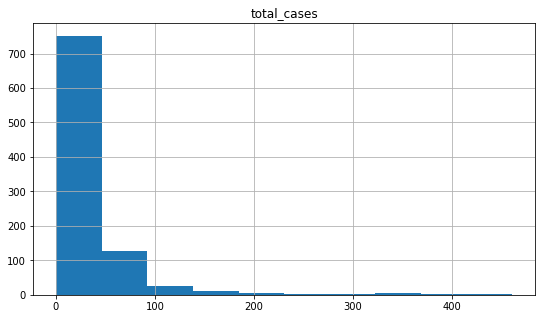

In [113]:
plt.rcParams["figure.figsize"] = [9,5]
y_sj_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dcb06a0>]],
      dtype=object)

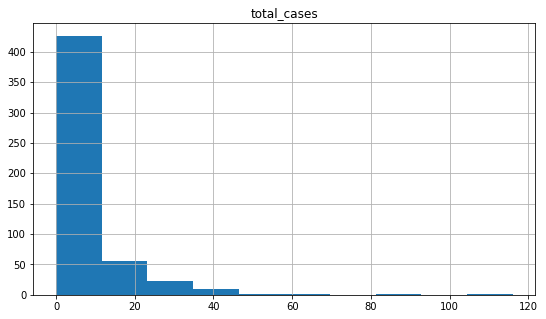

In [114]:
plt.rcParams["figure.figsize"] = [9,5]
y_iq_train.hist()

In [94]:
X_sj_train['total_cases'] = y_sj_train.total_cases
X_iq_train['total_cases'] = y_iq_train.total_cases

X_sj_test['total_cases'] = y_sj_test.total_cases
X_iq_test['total_cases'] = y_iq_test.total_cases

In [95]:
# compute the correlations
sj_correlations = X_sj_train.corr()
iq_correlations = X_iq_train.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

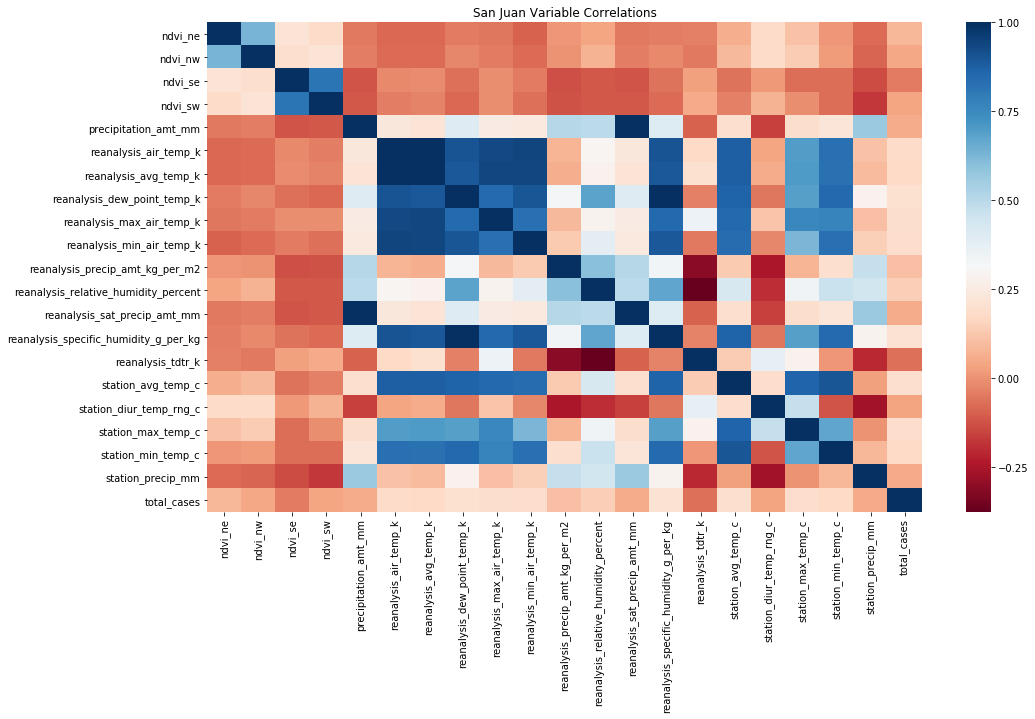

In [96]:
# plot san juan
plt.rcParams["figure.figsize"] = [16,9]
sj_corr_heat = sns.heatmap(sj_correlations,cmap='RdBu')
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

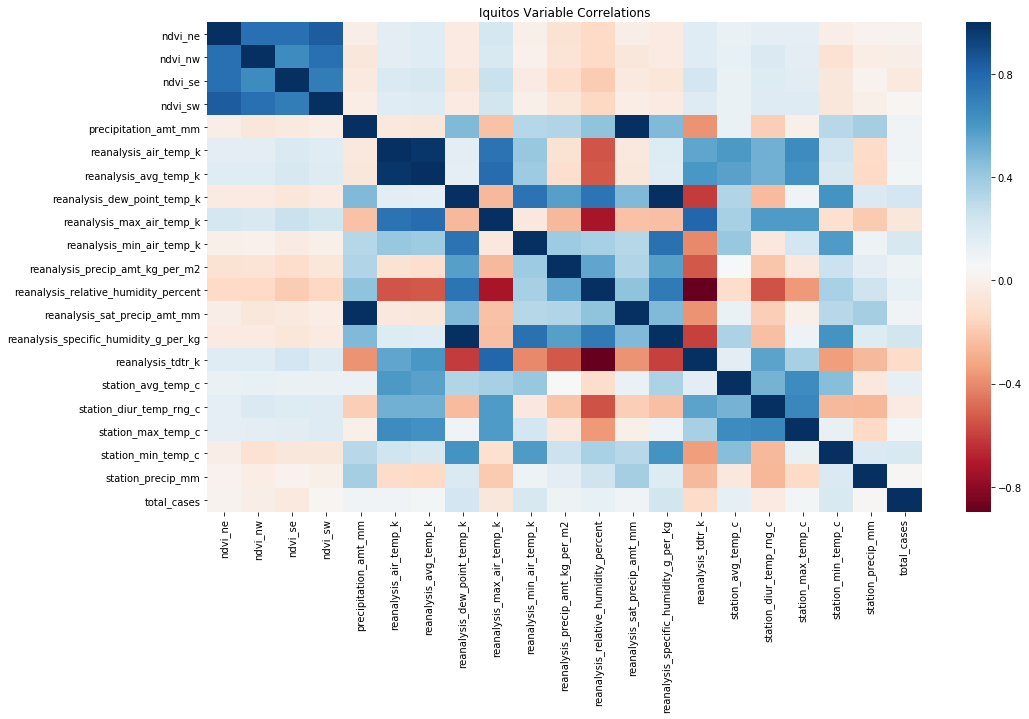

In [97]:
# plot san juan
plt.rcParams["figure.figsize"] = [16,9]
sj_corr_heat = sns.heatmap(iq_correlations,cmap='RdBu')
plt.title('Iquitos Variable Correlations')

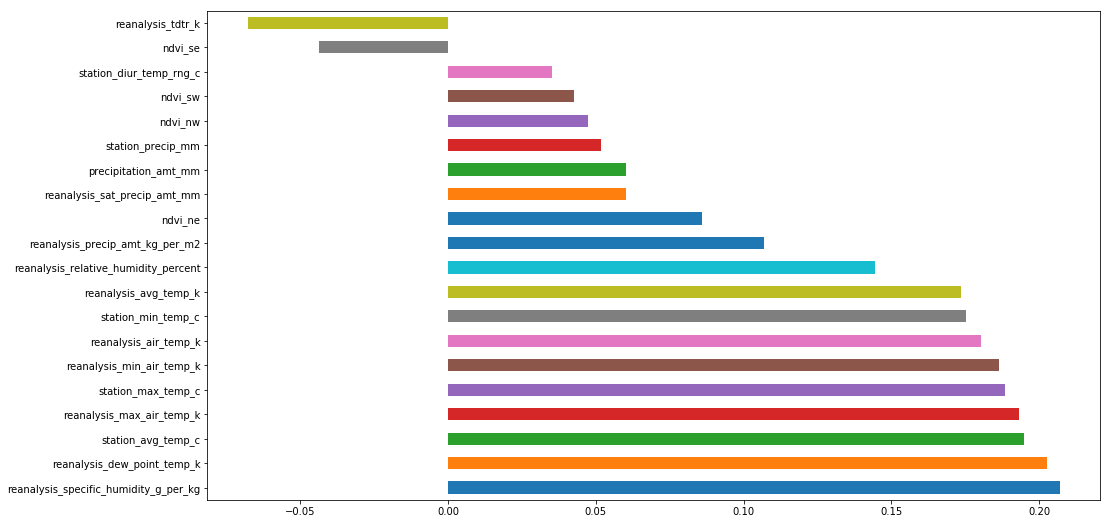

In [98]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

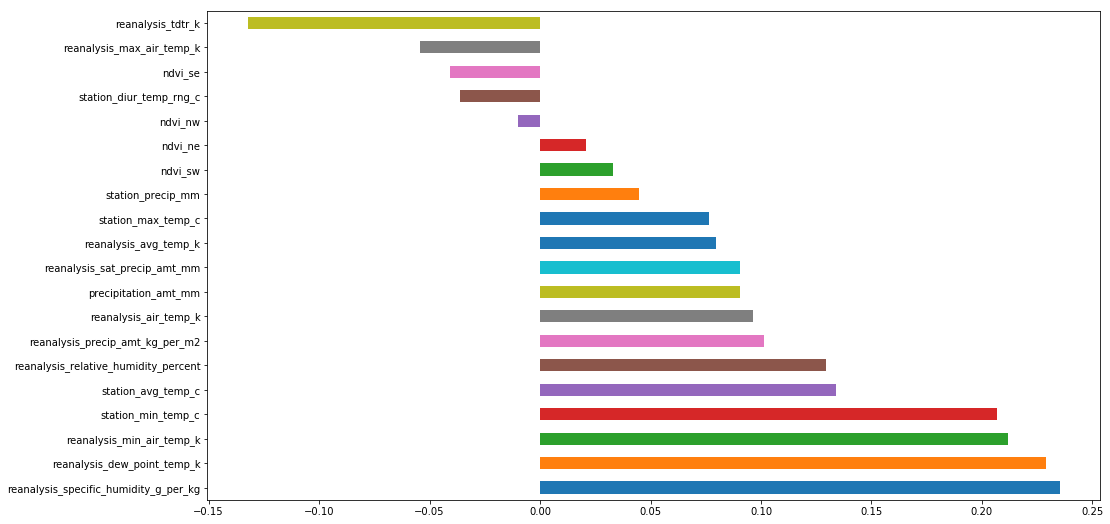

In [99]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [100]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
import statsmodels.api as sm

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = 'total_cases ~ 1 + ' \
                    'ndvi_ne +'\
                    'ndvi_nw +'\
                    'ndvi_se +'\
                    'ndvi_sw +'\
                    'precipitation_amt_mm +'\
                    'reanalysis_air_temp_k +'\
                    'reanalysis_avg_temp_k +'\
                    'reanalysis_dew_point_temp_k +'\
                    'reanalysis_max_air_temp_k +'\
                    'reanalysis_min_air_temp_k +'\
                    'reanalysis_precip_amt_kg_per_m2 +'\
                    'reanalysis_relative_humidity_percent +'\
                    'reanalysis_sat_precip_amt_mm +'\
                    'reanalysis_specific_humidity_g_per_kg +'\
                    'reanalysis_tdtr_k +'\
                    'station_avg_temp_c +'\
                    'station_diur_temp_rng_c +'\
                    'station_max_temp_c +'\
                    'station_min_temp_c +'\
                    'station_precip_mm'
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score
    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

sj_best_model = get_best_model(X_sj_train, X_sj_test)
iq_best_model = get_best_model(X_iq_train, X_iq_test)

best alpha =  0.0001
best score =  30.76153846153846
best alpha =  1e-08
best score =  6.596153846153846


In [78]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
import statsmodels.api as sm

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score
    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

sj_best_model = get_best_model(X_sj_train, X_sj_test)
iq_best_model = get_best_model(X_iq_train, X_iq_test)

best alpha =  1e-08
best score =  35.20384615384615
best alpha =  1e-08
best score =  7.198717948717949


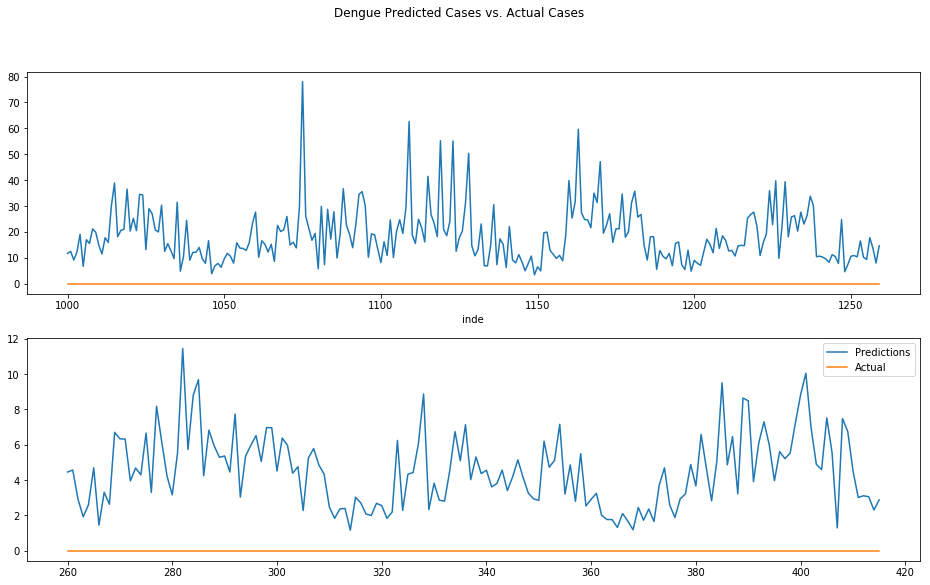

In [101]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
y_sj_test['fitted'] = sj_best_model.fittedvalues
y_sj_test.fitted.plot(ax=axes[0], label="Predictions")
y_sj_test.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
y_iq_test['fitted'] = iq_best_model.fittedvalues
y_iq_test.fitted.plot(ax=axes[1], label="Predictions")
y_iq_test.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

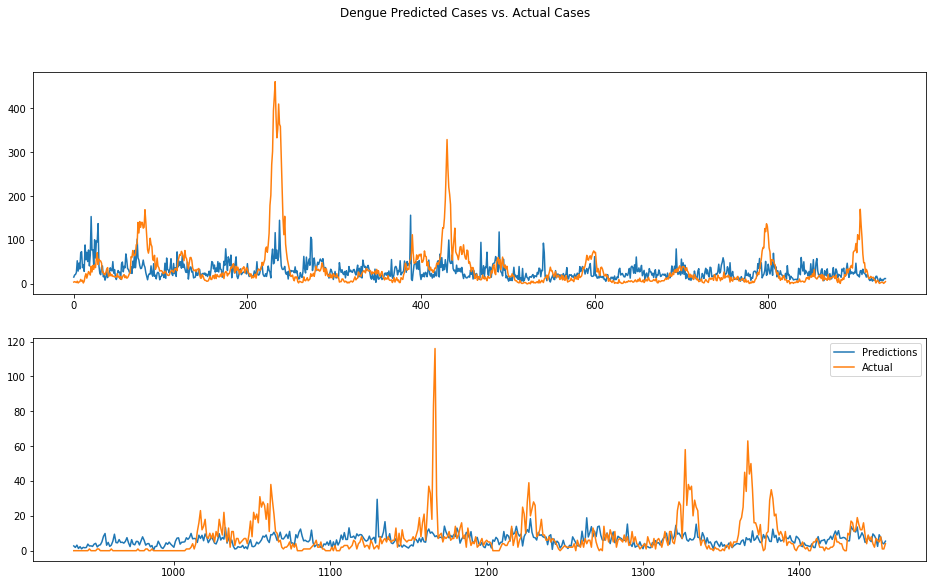

In [102]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
y_sj_train['fitted'] = sj_best_model.fittedvalues
y_sj_train.fitted.plot(ax=axes[0], label="Predictions")
y_sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
y_iq_train['fitted'] = iq_best_model.fittedvalues
y_iq_train.fitted.plot(ax=axes[1], label="Predictions")
y_iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [117]:
print(X_sj_train.shape)
print(X_sj_test.shape)
print(y_sj_train.shape)
print(y_sj_test.shape)

(936, 20)
(260, 20)
(936, 1)
(260, 1)


In [121]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(100)

model.fit(X_sj_train, y_sj_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
ypred = model.predict(X_sj_train)

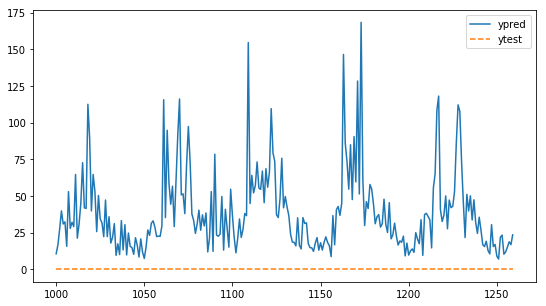

In [120]:
plt.plot(y_sj_test.index, ypred, label="ypred")
plt.plot(y_sj_test.index, y_sj_test["total_cases"],"--", label="ytest")
plt.legend()

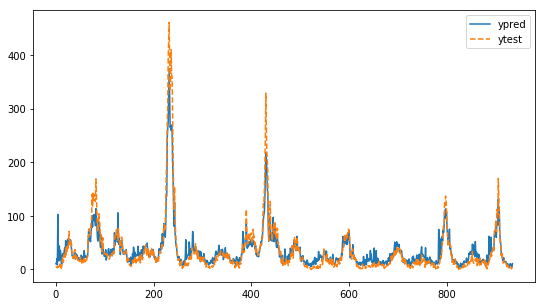

In [123]:
plt.plot(y_sj_train.index, ypred, label="ypred")
plt.plot(y_sj_train.index, y_sj_train["total_cases"],"--", label="ytest")
plt.legend()

In [21]:
X_sj_test

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,0
1,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,0
2,-0.001500,-0.016133,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,0
3,0.027650,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,0
4,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,0
5,-0.044000,-0.030467,0.132000,0.083529,71.17,299.768571,299.728571,295.314286,301.9,297.6,...,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7,0
6,-0.044300,-0.024925,0.132271,0.159157,48.99,300.062857,300.007143,295.650000,302.4,297.5,...,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7,0
7,-0.016750,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,...,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3,0
8,0.010800,0.049900,0.100571,0.117329,8.02,300.601429,300.621429,296.268571,302.5,298.5,...,77.395714,8.02,17.678571,2.785714,28.657143,6.242857,32.8,23.9,28.7,0
9,0.072667,0.106660,0.155429,0.164900,17.52,300.497143,300.528571,296.411429,302.3,298.7,...,78.534286,17.52,17.808571,2.228571,28.457143,4.628571,31.1,25.0,2.9,0


In [64]:
(np.linspace(0,10,11))

AttributeError: module 'numpy' has no attribute 'to_int'

In [143]:
sj_best_model.fittedvalues[1]

1    20.631967
1    19.532948
dtype: float64

In [56]:
len(y_sj_train)

936